# MultiStoreProductForecasting-with-Prophet

In [1]:
!pip install fbprophet

## 1- import Dependencies

In [3]:
import pandas as pd
from fbprophet import Prophet

## 2- Load data

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

,Date,Store/Product,Value
0,20180101,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES-TESLA_MODEL_X,2660.000


In [6]:
df.dtypes

Date               int64
Store/Product     object
Value            float64
dtype: object

In [7]:
df.isnull().sum()

Date             0
Store/Product    0
Value            0
dtype: int64

In [12]:
df['Store/Product'].unique()

array(['LOS_ANGELES-TESLA_MODEL_X', 'LOS_ANGELES-TESLA_MODEL_S',
       'SAN_FRANCISCO-TESLA_MODEL_S'], dtype=object)

## 3- Apply Data preprocesing

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [14]:
#filtering
frame = df[df['Store/Product']=='LOS_ANGELES-TESLA_MODEL_X'][["Date", 'Value']].copy()
frame.head()

,Date,Value
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [15]:
frame.columns = ['ds', 'y']
frame.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


## 4- Create Time Series Model

In [17]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(frame)

## 5 - Evaluate Model

In [18]:
future = m.make_future_dataframe(periods= 400, freq='D')

In [19]:
future.tail()

,ds
1475,2022-01-16
1476,2022-01-17
1477,2022-01-18
1478,2022-01-19
1479,2022-01-20


In [21]:
forecast = m.predict(future)

In [22]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1475,2022-01-16,4564.323823,2653.780170,5889.553949,4538.240803,4590.708467,-330.281154,-330.281154,-330.281154,467.724032,467.724032,467.724032,25.193655,25.193655,25.193655,-823.198841,-823.198841,-823.198841,0.0,0.0,0.0,4234.042669
1476,2022-01-17,4565.402761,2745.149522,5808.143803,4539.217921,4591.905610,-326.016625,-326.016625,-326.016625,467.724032,467.724032,467.724032,16.611941,16.611941,16.611941,-810.352598,-810.352598,-810.352598,0.0,0.0,0.0,4239.386136
1477,2022-01-18,4566.481699,2593.233736,5733.991937,4540.195038,4593.101993,-343.191950,-343.191950,-343.191950,467.724032,467.724032,467.724032,-11.285067,-11.285067,-11.285067,-799.630915,-799.630915,-799.630915,0.0,0.0,0.0,4223.289750
1478,2022-01-19,4567.560638,2623.567384,5805.967909,4541.172156,4594.298376,-327.757342,-327.757342,-327.757342,467.724032,467.724032,467.724032,-4.407267,-4.407267,-4.407267,-791.074108,-791.074108,-791.074108,0.0,0.0,0.0,4239.803295
1479,2022-01-20,4568.639576,2703.676312,5746.305079,4542.149274,4595.494758,-294.478531,-294.478531,-294.478531,467.724032,467.724032,467.724032,22.462032,22.462032,22.462032,-784.664595,-784.664595,-784.664595,0.0,0.0,0.0,4274.161046


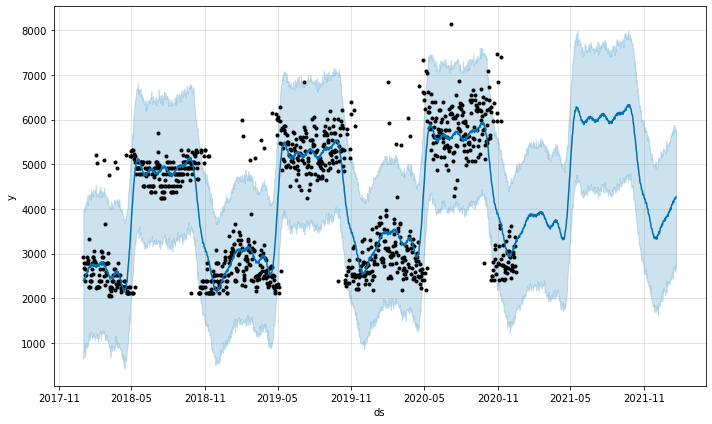

In [24]:
plot1 = m.plot(forecast)

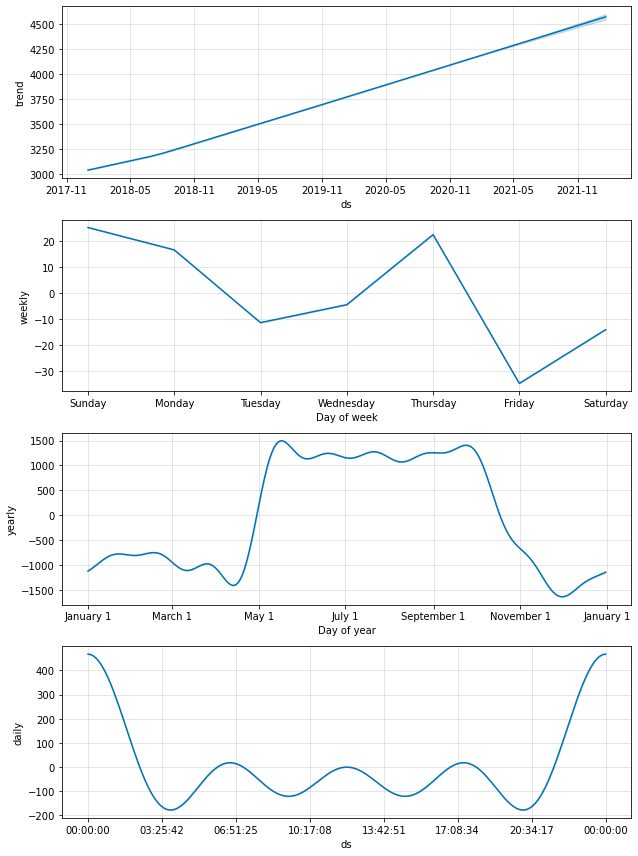

In [25]:
plot2 = m.plot_components(forecast)

# BONUS ROUND - Scaling Up

In [26]:
lines = df['Store/Product'].unique()
lines

array(['LOS_ANGELES-TESLA_MODEL_X', 'LOS_ANGELES-TESLA_MODEL_S',
       'SAN_FRANCISCO-TESLA_MODEL_S'], dtype=object)

In [28]:
for stock_lines in lines:
    frame = frame = df[df['Store/Product']==stock_lines].copy()
    print(frame.tail())

           Date              Store/Product        Value
1075 2020-12-12  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1076 2020-12-13  LOS_ANGELES-TESLA_MODEL_X  3167.594500
1077 2020-12-14  LOS_ANGELES-TESLA_MODEL_X  3383.354511
1078 2020-12-15  LOS_ANGELES-TESLA_MODEL_X  2714.591329
1079 2020-12-16  LOS_ANGELES-TESLA_MODEL_X  2585.035107
           Date              Store/Product        Value
2155 2020-12-12  LOS_ANGELES-TESLA_MODEL_S  3501.353950
2156 2020-12-13  LOS_ANGELES-TESLA_MODEL_S  3505.353950
2157 2020-12-14  LOS_ANGELES-TESLA_MODEL_S  3751.689962
2158 2020-12-15  LOS_ANGELES-TESLA_MODEL_S  3008.050462
2159 2020-12-16  LOS_ANGELES-TESLA_MODEL_S  2866.538618
           Date                Store/Product        Value
3235 2020-12-12  SAN_FRANCISCO-TESLA_MODEL_S  2899.835050
3236 2020-12-13  SAN_FRANCISCO-TESLA_MODEL_S  2896.835050
3237 2020-12-14  SAN_FRANCISCO-TESLA_MODEL_S  3094.019060
3238 2020-12-15  SAN_FRANCISCO-TESLA_MODEL_S  2492.132196
3239 2020-12-16  SAN_FRANCISCO-TESLA_M

In [31]:
fit_models = {}
for stock_lines in lines:
    frame = frame = df[df['Store/Product']==stock_lines].copy()
    frame.drop('Store/Product', axis = 1, inplace=True)
    frame.columns = ['ds','y']
    
    m = Prophet(interval_width=0.95, daily_seasonality=True)
    model = m.fit(frame)
    fit_models[stock_lines] = m

In [32]:
fit_models

{'LOS_ANGELES-TESLA_MODEL_X': <fbprophet.forecaster.Prophet at 0x1cd289b1370>,
 'LOS_ANGELES-TESLA_MODEL_S': <fbprophet.forecaster.Prophet at 0x1cd28a26370>,
 'SAN_FRANCISCO-TESLA_MODEL_S': <fbprophet.forecaster.Prophet at 0x1cd28cc1d90>}

In [33]:
foward = fit_models['SAN_FRANCISCO-TESLA_MODEL_S'].make_future_dataframe(periods=200, freq='D')
forecast = fit_models['SAN_FRANCISCO-TESLA_MODEL_S'].predict(foward)

In [35]:
forecast[['ds','yhat']].tail()

,ds,yhat
1275,2021-06-30,5423.780879
1276,2021-07-01,5442.850444
1277,2021-07-02,5387.668179
1278,2021-07-03,5404.217235
1279,2021-07-04,5439.351296


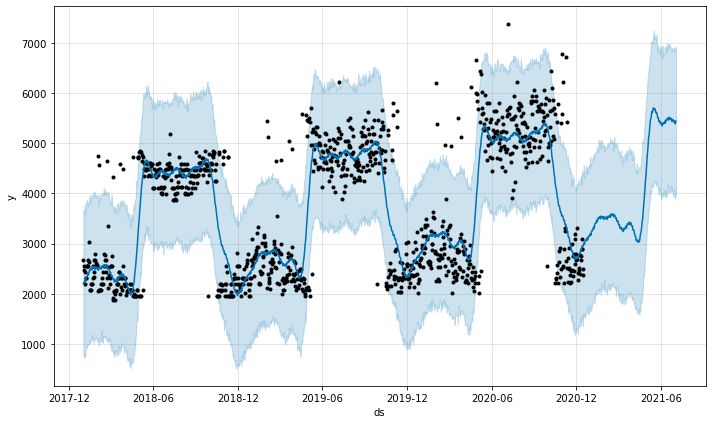

In [36]:
plot3 = m.plot(forecast)

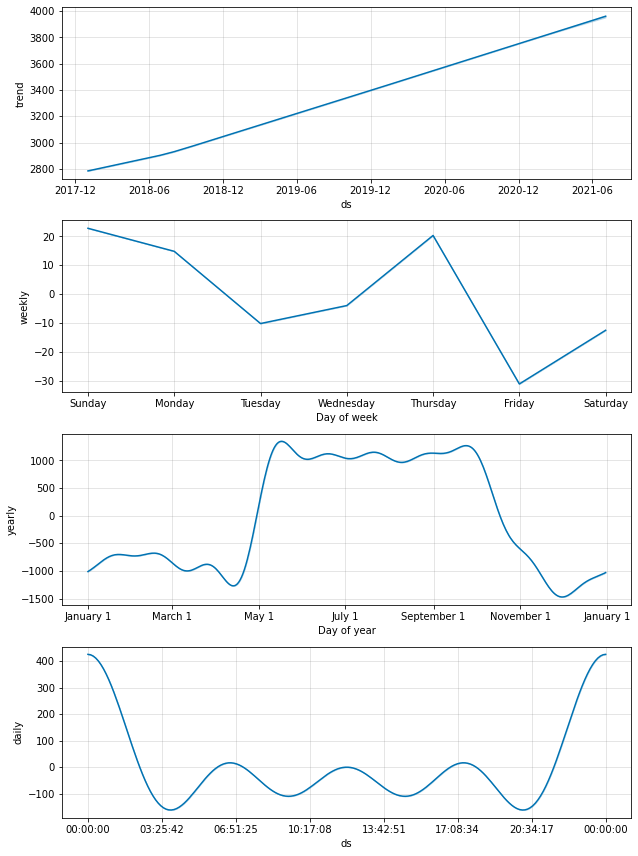

In [37]:
plot4 = m.plot_components(forecast)